# 1. Install and Import Dependencies

In [1]:
%pip install tensorflow==2.12.0 tensorflow-gpu==2.12.0 opencv-python mediapipe scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-zwfmn86u/tensorflow-gpu_4ad5ac40ed2a4099b8cb895dfefacfc7/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This er

In [42]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Essential Points with MP Holistic

In [43]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [44]:
# Defining the function to identify the landmarks 
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [45]:
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

The following code tests the webcam using OpenCV and the MediaPipe Holistic model for real-time landmark detection. It initializes the camera and continuously captures video frames while processing each frame to detect and draw landmarks. The annotated frames are displayed in an OpenCV window, which automatically closes after 10 seconds or can be exited earlier by pressing 'q'. 

Side Note:
Use cap = cv2.VideoCapture(1) if you're using a MacBook, or cap = cv2.VideoCapture(0) if you're using Windows to access the webcam.


In [6]:
import cv2
import mediapipe as mp
import time  # Import time module for tracking the duration

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic

# Access the webcam
cap = cv2.VideoCapture(1)

# Set up the MediaPipe model with detection and tracking confidence
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    start_time = time.time()  # Record the start time
    
    while cap.isOpened():  # Loop through frames
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break  # Exit the loop if frame is not captured

        # Make detections using the defined function
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks on the image
        draw_landmarks(image, results)

        # Display the image on the screen
        cv2.imshow('OpenCV Feed', image)

        # Break the loop after 10 seconds
        if time.time() - start_time > 10:
            print("10 seconds reached. Closing window.")
            break

        # Break the loop gracefully when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/aninjo/.local/lib/python3.10/site-packages/cv2/qt/plugins"


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

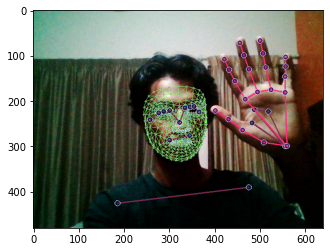

In [8]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

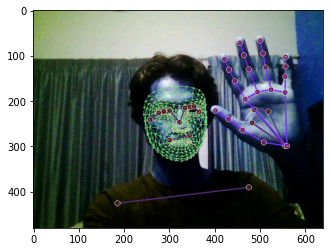

In [9]:
plt.imshow(frame)

# 3. Extract Keypoint Values

In [ ]:
len(results.left_hand_landmarks.landmark)

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

In [46]:
# Extracting the keypoint values in the frame 
# So if the their is no detection then the values are replaced with zero using an if statement
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# 4. Setup Folders for Collection

The provided code sets up a directory structure for collecting data to train a sign language recognition model. It creates folders for various actions (like 'Play', 'Goodbye', 'Yes', etc.), each containing subfolders for multiple recorded sequences (0 to 19). When recording, ensure the gestures match the folder names for effective training. You can also adjust the `no_sequences` variable to change the number of recordings per action as needed.

In [47]:
DATA_PATH = '/home/aninjo/Desktop/UNI/Sign_Language/ASD/Data/'

# Actions that we try to detect
actions = np.array(['Play','GoodBye','Yes','No','Thank You','Hello','I Love You','Name'])

no_sequences = 20

# Videos are going to be 30 frames in length
sequence_length = 20

start_folder = 20
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
start_folder = 20
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Gather Keypoint Values for Training and Testing

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/aninjo/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Prepare Data by Creating Labels and Features

In [48]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [49]:
label_map = {label:num for num, label in enumerate(actions)}

In [50]:
label_map

{'Play': 0,
 'GoodBye': 1,
 'Yes': 2,
 'No': 3,
 'Thank You': 4,
 'Hello': 5,
 'I Love You': 6,
 'Name': 7}

In [51]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [52]:
np.array(sequences).shape

(160, 20, 1662)

In [53]:
np.array(labels).shape
X = np.array(sequences)

In [54]:
y = to_categorical(labels).astype(int)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# 7. Build and Train LSTM Neural Network

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [57]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [63]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [64]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [65]:
model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
3/3 [==============================] - 7s 91ms/step - loss: 2.1001 - categorical_accuracy: 0.1500
Epoch 2/250
3/3 [==============================] - 0s 90ms/step - loss: 2.1150 - categorical_accuracy: 0.0750
Epoch 3/250
3/3 [==============================] - 0s 97ms/step - loss: 2.1547 - categorical_accuracy: 0.1125
Epoch 4/250
3/3 [==============================] - 0s 85ms/step - loss: 2.1184 - categorical_accuracy: 0.1500
Epoch 5/250
3/3 [==============================] - 0s 86ms/step - loss: 2.0605 - categorical_accuracy: 0.1250
Epoch 6/250
3/3 [==============================] - 0s 88ms/step - loss: 2.0851 - categorical_accuracy: 0.1750
Epoch 7/250
3/3 [==============================] - 0s 88ms/step - loss: 2.0574 - categorical_accuracy: 0.1750
Epoch 8/250
3/3 [==============================] - 0s 91ms/step - loss: 2.0985 - categorical_accuracy: 0.1750
Epoch 9/250
3/3 [==============================] - 0s 85ms/step - loss: 2.0297 - categorical_accuracy: 0.2125
Epoch 10/2

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 20, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 8)                 264       
                                                                 
Total params: 596,840
Trainable params: 596,840
Non-tr


# 8. Generate Predictions

In [67]:
res = model.predict(X_test)
actions[np.argmax(res[2])]

3/3 [==============================] - 1s 35ms/step


'Hello'

# 9. Save Weights and Evaluate with Confusion Matrix and Accuracy

In [68]:
model.save('action.h5')
model.load_weights('action.h5')

In [69]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


3/3 [==============================] - 0s 32ms/step


In [70]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[71,  0],
        [ 1,  8]],

       [[62,  8],
        [ 3,  7]],

       [[65,  5],
        [ 4,  6]],

       [[69,  0],
        [ 4,  7]],

       [[69,  3],
        [ 4,  4]],

       [[69,  1],
        [ 2,  8]],

       [[60,  8],
        [ 5,  7]],

       [[70,  0],
        [ 2,  8]]])

In [71]:
accuracy_score(ytrue, yhat)

0.6875

In [74]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,20), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


qt.qpa.xcb: QXcbConnection: XCB error: 146 (Unknown), sequence: 9050, resource id: 0, major code: 139 (Unknown), minor code: 20
qt.qpa.xcb: QXcbConnection: XCB error: 146 (Unknown), sequence: 9055, resource id: 1509, major code: 139 (Unknown), minor code: 20
qt.qpa.xcb: QXcbConnection: XCB error: 146 (Unknown), sequence: 9063, resource id: 0, major code: 139 (Unknown), minor code: 20
qt.qpa.xcb: QXcbConnection: XCB error: 146 (Unknown), sequence: 9068, resource id: 1511, major code: 139 (Unknown), minor code: 20


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [32]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 103ms/step


array([[8.92115409e-11, 1.22833887e-06, 4.59819694e-06, 2.93712416e-11,
        1.29139265e-02, 5.24849886e-11, 9.87080038e-01, 2.26121045e-07]],
      dtype=float32)

In [29]:
result_test = extract_keypoints(results)

In [30]:
result_test

array([ 0.6664573 ,  0.57344627, -1.12799525, ...,  0.        ,
        0.        ,  0.        ])